# Machine Learning Homework 4

## Logistic Regression

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
class logistic_regression:
    def __init__(self, lr=0.01, threshold=0.001):
        self.lr = lr
        self.threshold = threshold
    
    def generate_data_points(self, arg0, arg1):
        points_0 = np.concatenate((np.ones(arg0['num']).reshape(-1, 1),
                                   (np.random.randn(arg0['num'])*arg0['x_var'] + arg0['x_mean']).reshape(-1, 1),
                                   (np.random.randn(arg0['num'])*arg0['y_var'] + arg0['y_mean']).reshape(-1, 1)),
                                   axis=1)
        points_1 = np.concatenate((np.ones(arg1['num']).reshape(-1, 1),
                                   (np.random.randn(arg1['num'])*arg1['x_var'] + arg1['x_mean']).reshape(-1, 1),
                                   (np.random.randn(arg1['num'])*arg1['y_var'] + arg1['y_mean']).reshape(-1, 1)),
                                   axis=1)
        points = np.append(points_0, points_1, axis=0)
        labels = np.append(np.zeros(arg0['num']), np.ones(arg1['num']))
        
        return points, labels
        
    def gradient_decent(self, points):
        w = np.zeros(3)

        i = 0
        while True:
            h = 1/(1+np.exp(-points.dot(w)))
            d_J = (h-labels).dot(points)
            w -= self.lr*d_J

            if np.linalg.norm(d_J) <= self.threshold:
                break
                
            if i%10000 == 0:
                print(w)
        
        print('Result: {}'.format(w))
        return w
        
    def newton_method(self, points):
        w = np.zeros(3)

        def is_singular(a):
            return a.shape[0] == a.shape[1] and np.linalg.matrix_rank(a) == a.shape[0]

        i = 0
        while True:
            h = 1/(1+np.exp(-points.dot(w)))
            D = np.diag(h*(1-h))
            H = points.T.dot(D).dot(points)
            d_f = (labels-h).dot(points)

            if is_singular(H):
                d = self.lr*(inv(H).dot(d_f))
            else:
                d = self.lr*d_f
                
            w += d

            if np.linalg.norm(d) <= self.threshold:
                break
                
            print(w)

        print('Result: {}'.format(w))
        return w
        
    def predict(self, points, w):
        t = 1/(1+np.exp(-points.dot(w)))
        return np.where(t < 0.5, 0, 1)
        
    def confusion(self, labels, preds):
        tp, fp, fn, tn = 0, 0, 0, 0
        for l, p in zip(labels, preds):
            if l == 0 and p == 0:
                tp += 1
            elif l == 0 and p == 1:
                fn += 1
            elif l == 1 and p == 0:
                fp += 1
            elif l == 1 and p == 1:
                tn += 1
        return {'tp': tp, 'fp': fp, 'fn': fn, 'tn': tn}

In [13]:
# Input parameters

N = 50
mx1, my1 = 1, 1
vx1, vy1 = 2, 2
mx2, my2 = 3, 3
vx2, vy2 = 4, 4

In [ ]:
model = logistic_regression(0.01, 1)

arg0 = {'num': N, 'x_mean': mx1, 'y_mean': my1, 'x_var': vx1, 'y_var': vy1}
arg1 = {'num': N, 'x_mean': mx2, 'y_mean': my2, 'x_var': vx2, 'y_var': vy2}

points, labels = model.generate_data_points(arg0, arg1)

w_gd = model.gradient_decent(points)
w_nm = model.newton_method(points)

pred_gd = model.predict(points, w_gd)
pred_nm = model.predict(points, w_nm)

confusion_gd = model.confusion(labels, pred_gd)
confusion_nm = model.confusion(labels, pred_nm)

# Display results
print('Gradient decent:')
print()
print('w: {}'.format(w_gd))
print()
print('Confusion matrix:')
print('                    Predict cluster 0     Predict cluster 1')
print('Is cluster 0        {}                    {}'.format(confusion_gd['tp'], confusion_gd['fp']))
print('Is cluster 1        {}                    {}'.format(confusion_gd['fn'], confusion_gd['tn']))
print()
print('Sensitivity (Successfully predict cluster 0): {}'.format(confusion_gd['tp']/(confusion_gd['tp']+confusion_gd['fp'])))
print('Specificity (Successfully predict cluster 1): {}'.format(confusion_gd['tn']/(confusion_gd['fn']+confusion_gd['tn'])))
print()
print()
print("Newton's mathod:")
print()
print('w: {}'.format(w_nm))
print()
print('Confusion matrix:')
print('                    Predict cluster 0     Predict cluster 1')
print('Is cluster 0        {}                    {}'.format(confusion_nm['tp'], confusion_nm['fp']))
print('Is cluster 1        {}                    {}'.format(confusion_nm['fn'], confusion_nm['tn']))
print()
print('Sensitivity (Successfully predict cluster 0): {}'.format(confusion_nm['tp']/(confusion_nm['tp']+confusion_nm['fp'])))
print('Specificity (Successfully predict cluster 1): {}'.format(confusion_nm['tn']/(confusion_nm['fn']+confusion_nm['tn'])))
print()

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(18.5, 5)

axs[0].plot(points[:arg0['num'], 1], points[:arg0['num'], 2], 'ro')
axs[0].plot(points[arg0['num']:, 1], points[arg0['num']:, 2], 'bo')

points_gd_0 = points[np.where(pred_gd==0)]
points_gd_1 = points[np.where(pred_gd==1)]
axs[1].plot(points_gd_0[:, 1], points_gd_0[:, 2], 'ro')
axs[1].plot(points_gd_1[:, 1], points_gd_1[:, 2], 'bo')

points_nm_0 = points[np.where(pred_nm==0)]
points_nm_1 = points[np.where(pred_nm==1)]
axs[2].plot(points_nm_0[:, 1], points_nm_0[:, 2], 'ro')
axs[2].plot(points_nm_1[:, 1], points_nm_1[:, 2], 'bo')

[0.         0.57003085 0.47234683]
[-0.26660977  0.15741713  0.0423977 ]
[-0.29631268  0.3346498   0.40164234]
[-0.4774153   0.16162116  0.02251746]
[-0.45060554  0.43383463  0.53552757]
[-0.64592688  0.20091633  0.07079964]
[-0.61869556  0.41370797  0.4792409 ]
[-0.77761213  0.22418152  0.08381408]
[-0.73649519  0.4269428   0.49582723]
[-0.88259492  0.24978319  0.10485058]
[-0.83815453  0.42279091  0.4854594 ]
[-0.96568092  0.27122966  0.12167151]
[-0.91920964  0.41965415  0.47837227]
[-1.03177416  0.28973475  0.13668764]
[-0.9849091   0.41600717  0.47063143]
[-1.08444271  0.30559179  0.15010349]
[-1.03821696  0.41233049  0.46272674]
[-1.12646483  0.31911203  0.16213001]
[-1.08152631  0.40883717  0.45488855]
[-1.16001343  0.33057712  0.17293532]
[-1.11674398  0.40563763  0.44726965]
[-1.18679839  0.34024061  0.1826562 ]
[-1.14539597  0.40278134  0.43996979]
[-1.20817182  0.34833278  0.19140693]
[-1.16870924  0.40027898  0.43305005]
[-1.22520718  0.35506387  0.19928525]
[-1.18767424  0

[-1.26213679  0.3833465   0.3405472 ]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.3405472 ]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.3405472 ]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.3405472 ]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.3405472 ]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.3405472 ]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.3405472 ]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.3405472 ]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.3405472 ]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.3405472 ]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.3405472 ]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.3405472 ]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.3405472 ]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679

[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728  0.38131601  0.27971269]
[-1.26213679  0.3833465   0.34054719]
[-1.27270728

In [ ]:
# Generate data points

gt_x1 = np.random.randn(N)*vx1 + mx1
gt_y1 = np.random.randn(N)*vy1 + my1

gt_x2 = np.random.randn(N)*vx2 + mx2
gt_y2 = np.random.randn(N)*vy2 + my2

x = np.append(gt_x1, gt_x2)
y = np.append(gt_y1, gt_y2)

labels = np.append(np.zeros(N), np.ones(N))
A = np.concatenate((np.ones((N*2, 1)), x.reshape((-1, 1)), y.reshape((-1, 1))), axis=1)

plt.plot(gt_x1, gt_y1, 'ro')
plt.plot(gt_x2, gt_y2, 'bo')

In [235]:
# Training: steepest gradient decent

w_gd = np.zeros(3)

while True:
    h = 1/(1+np.exp(-A.dot(w_gd)))
    d_J = (h-labels).dot(A)
    w_gd -= 0.01*d_J
    
    if np.linalg.norm(d_J) <= 0.001:
        break
        
print(w_gd)

[-26.26512439   2.2083036    2.16915572]


In [240]:
# Training: Newton's method

w_nm = np.zeros(3)

def is_singular(a):
    return a.shape[0] == a.shape[1] and np.linalg.matrix_rank(a) == a.shape[0]

while True:
    h = 1/(1+np.exp(-A.dot(w_nm)))
    D = np.diag(h*(1-h))
    H = A.T.dot(D).dot(A)
    d_f = (labels-h).dot(A)
    
    if is_singular(H):
        d = inv(H).dot(d_f)
    else:
        d = d_f
        
    if np.linalg.norm(d) <= 0.001:
        break
        
    w_nm += d
    
print(w_nm)

[-159.44233298   13.84934839   11.45650373]


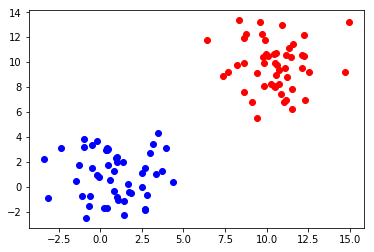

In [208]:
# Visualize the result

def classify(A, w):
    r = 1+np.exp(A.dot(w))
    return np.where(r < 0.5, 0, 1)

result_gd = 

In [244]:
def classify(A, w):
    r = 1/(1+np.exp(-A.dot(w)))
    return np.where(r < 0.5, True, False)

result_gd = classify(A, w_gd)
result_nm = classify(A, w_nm)

xy_gd = 

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False 

In [ ]:
def classify(x, y, w):
    r = w[0] + w[1]*x + w[2]*y
    return 1/(1+np.exp(r))

for i in range(N*2):
    print(classify(A[1], A[]))

In [60]:
# Training: Newton's method

A = np.concatenate((x.reshape((-1, 1)), y.reshape((-1, 1)), np.ones((N*2, 1))), axis=1)
#A = np.array([[0, 0, 1], [1, 1, 1]])
#labels = [0, 1]
#N = 1
w = np.ones(3)

for i in range(30):
    print(str(i) + ': ')
    
    D = np.diag([e/(1+e) for e in [np.exp(-A[i].dot(w)) for i in range(N*2)]])
    d_f = A.T.dot([labels[i]-(1/(1+np.exp(-A[i].dot(w)))) for i in range(N*2)])
    
    print(A[1].dot(w))
    print(A)
    print(D)
    print(A.T.dot(D).dot(A))
    print(d_f)
    
    w = w - A.T.dot(D).dot(A).dot(d_f)
    
    print(w)

0: 
2.5702835372241566
[[ 2.18819888 -3.03790146  1.        ]
 [ 1.5327906   0.03749294  1.        ]
 [ 1.00610527  1.2001686   1.        ]
 [ 2.19615466  3.19282393  1.        ]
 [ 0.78863133  3.20279616  1.        ]
 [-2.51464189 -1.03738451  1.        ]
 [-0.6916844  -0.86935395  1.        ]
 [ 4.28065208  0.56323626  1.        ]
 [ 2.80186695  2.37561505  1.        ]
 [-3.28539176  4.52122635  1.        ]
 [-3.26454128  2.25822002  1.        ]
 [ 0.47121085  3.74852021  1.        ]
 [ 2.95725959  1.2664829   1.        ]
 [ 2.76654836  1.81347967  1.        ]
 [ 2.08836796  1.38569921  1.        ]
 [ 6.75809454  3.62902318  1.        ]
 [-1.39364789  0.44246826  1.        ]
 [ 2.02933926 -0.61725072  1.        ]
 [-0.07711201 -2.37047827  1.        ]
 [-1.14946931  2.48648839  1.        ]
 [-0.72655372  5.62340829  1.        ]
 [ 3.09066418  1.6544411   1.        ]
 [ 1.09448884  1.12059302  1.        ]
 [ 1.45317134  1.10862677  1.        ]
 [ 1.84446237  1.21012295  1.        ]
 [

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


In [70]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

x_train = np.concatenate((x.reshape((-1, 1)), y.reshape((-1, 1)), np.ones((N*2, 1))), axis=1)
y_train = labels
theta = np.ones((N*2, 1))
for i in range(0, 10):
    h = sigmoid(x_train.dot(w))
    error = h - y_train
    tmp = (-1)*y_train*np.log(h) - (1-y_train)*np.log((1-h))
    J = np.sum(tmp)
    #calculate H
    H = (h*(1-h)*(x_train)).dot(x_train.T)/m
    #calculate dJ
    dJ = np.sum(error*x_train, axis=1)/m
    #gradient = H-1.dJ
    grad = inv(H).dot(dJ)
    #update theta
    theta = theta - (np.array([grad])).T
    print(J)

ValueError: operands could not be broadcast together with shapes (100,) (100,3) 

In [3]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

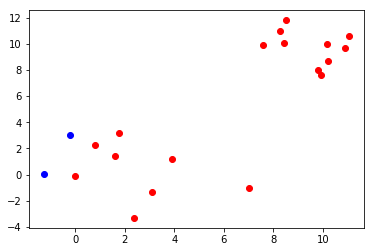

In [199]:
# Visualize the result

def classify(x, y, w):
    r = w[0]*x + w[1]*y + w[2]
    return 0 if r < 0.5 else 1

tr_x1, tr_y1 = [], []
tr_x2, tr_y2 = [], []
for i in range(N*2):
    if classify(x[i], y[i], w) == 0:
        tr_x1.append(x[i])
        tr_y1.append(y[i])
    else:
        tr_x2.append(x[i])
        tr_y2.append(y[i])
        
plt.plot(tr_x1, tr_y1, 'ro')
plt.plot(tr_x2, tr_y2, 'bo')

In [20]:
for i in range(N*2):
    print(w[0]*x[i] + w[1]*y[i] + w[2])

-187.16239959034613
-285.92344696257874
-271.2130007797017
-288.20061547622015
-163.600809018493
-249.9323800606397
-301.27319004253906
-180.03227619660504
-291.92218656392765
-312.13757903482605
-170.3412556354874
-176.55236002443465
-317.2532876612921
-77.54198366759744
-303.5264173387925
-275.3973835755876
-255.05588113559048
-210.2850595379847
-349.4329713872995
-239.9779471960626
-193.68301367628197
-17.18562331139995
-179.47664927491593
-163.91022842549756
-84.68805500552585
-207.25153999374567
-338.09746644421
-67.61326860690443
-178.73708519105213
-136.2403754712206
-299.91694114372706
-155.17831477830651
-94.08347994215143
-232.11580007937263
-165.33025505637133
-49.39873938235894
-259.00144510662386
-282.0938806779368
-332.82096520721956
-307.49411710692414
-421.2428184781116
-360.050746178339
-157.46145571146593
-240.04194952395326
-157.74946944000254
-175.77644180405747
-112.33114300497357
-400.57587596632163
-181.14926879469664
-99.18980374157599
151.66886381668374
285.462

## EM Algorithm

In [2]:
import numpy as np

In [3]:
# parse the input files

import struct

with open('./train-labels-idx1-ubyte', 'rb') as f:
    data = f.read()
    offset = 0
    fmt = '>2i'
    magic_num, num_labels = struct.unpack_from(fmt, data, offset)
    offset += struct.calcsize(fmt)
    fmt = '>{}B'.format(str(num_labels))
    labels = np.array(struct.unpack_from(fmt, data, offset))

with open('./train-images-idx3-ubyte', 'rb') as f:
    data = f.read()
    offset = 0
    fmt = '>4i'
    magic_num, num_images, height, width = struct.unpack_from(fmt, data, offset)
    image_size = height*width
    offset += struct.calcsize(fmt)
    fmt = '>{}B'.format(str(image_size))
    images = np.empty((num_images, image_size))
    for i in range(num_images):
        images[i] = np.array(struct.unpack_from(fmt, data, offset))
        offset += struct.calcsize(fmt)
        
# Preprocess input images

binning = np.vectorize(lambda x: 0 if x < 128 else 1)
images = f(binning)

In [59]:
mean = np.random.random_sample((10, 784))
pi = np.ones(10)*0.1

def zero_handling(x):
    if x == 0:
        return 0.000001
    elif x == 1:
        return 0.999999
    else:
        return x
zero_handling_v = np.vectorize(zero_handling)

for i in range(10):
    predictions = []
    w = []
    
    # Expectation step
    for img in images[:1000]:
        t = np.array([pi[k]*np.log([mean[k][l] if img[l] > 0 else (1-mean[k][l]) for l in range(784)]).sum() for k in range(10)])
        z = t/t.sum()
        w.append(z)
        predictions.append(np.argmax(z))
        
    # Maximize step
    Nm = np.sum(w, axis=0)
    for i in range(10):
        mean[i] = np.sum([w[j][i]*images[j] for j in range(1000)])/Nm[i]
    pi = Nm/1000
    
    for i in range(10):
        print(mean[i])

[ 101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log


[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  

In [55]:
unbinning = np.vectorize(lambda x: 0 if x < 0.5 else 1)
imaginations = unbinning(mean)

for i in range(10):
    for j in range(28):
        print(imaginations[i][j*28:(j+1)*28])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0

In [8]:
print(pi)

[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
